<a href="https://colab.research.google.com/github/elisaduan2005/chicago-crime-analysis/blob/main/Question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime

violence = pd.read_csv('violence.csv')

crimes = pd.read_csv("crimes.csv")

#clean the crimes and violence data
from datetime import date

#initialize alphabet to get rid of nonalphabetical characters
alpha=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ']
new_col_names={}
col_of_n=[]
for col in crimes.columns:
  col=col.lower()
  col = col.lstrip()
  col=col.replace('  ',' ')
  col=col.replace('#',' number')
  for char in col:
    if char not in alpha:
      col=col.replace(char,'')
  col_of_n.append(col.replace(" ",'_'))


for n in range(0, len(col_of_n)):
    new_col_names[crimes.columns[n]]=col_of_n[n]

#rename col of crimes
crimes=crimes.rename(columns=new_col_names)
crimes=crimes.rename(columns={'date_of_occurrence':'date'})

#cast columns to proper type
crimes['date'] = pd.to_datetime(crimes['date'])
crimes['year'] = crimes['date'].dt.year
crimes['month'] = crimes['date'].dt.month_name()
crimes['time_of_crime'] = crimes['date'].dt.time
crimes['day_of_week'] = crimes['date'].dt.day_name()

#make crimes['block'] match style of violene blocks
crimes['block']=crimes['block'].str.replace('X','0')
crimes['block'] = crimes['block'].str.lstrip('0')

#droip unneeded data
crimes=crimes.drop(['x_coordinate','y_coordinate','location','beat','arrest'], axis=1)

#change everything to lower case
violence.columns = violence.columns.str.lower()

#remove any leading spaces
violence.columns = violence.columns.str.lstrip()

#replace spaces with underscore
violence.columns = violence.columns.str.replace(' ', '_')

#delete any double spaces
violence.columns = violence.columns.str.replace('__', '_')

violence['location']=violence['location'].str.replace('POINT ','')

#changing data to appropriate format

violence['date'] = pd.to_datetime(violence['date'])
violence['year'] = violence['date'].dt.year
violence['month'] = violence['date'].dt.month_name()
violence['time_of_crime'] = violence['date'].dt.time
violence['day_of_week'] = violence['date'].dt.day_name()

violence=violence.drop(['homicide_victim_first_name', 'homicide_victim_mi',
       'homicide_victim_last_name','state_house_district', 'state_senate_district',
       'updated','street_outreach_organization','ward','beat','hour','area','location'], axis=1)


<ipython-input-388-6d04ff7ff65d>:4: DtypeWarning:

Columns (25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-388-6d04ff7ff65d>:34: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<ipython-input-388-6d04ff7ff65d>:63: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



The second question we aim to answer is how often certain crimes occur across different
locations and times of the day, week, and year in Chicago. By analyzing the “Violence Reduction -
Victims of Homicides and Non-Fatal Shootings” dataset (1990-2025), we can extract dates, times, and
addresses for each recorded violent crime. Additionally, the “Crimes - One Year Prior to Present” CSV
dataset provides records of various offenses— theft, assault, burglary, narcotics, weapons violations, and
battery—within the past year (2024-present). From this dataset, we can also extract dates, locations, and
crime for each record. By grouping types of crime, and noting the different times and locations, we can
identify patterns in when and where certain types of crimes are most frequent. Our primary focus is to
determine whether less privileged communities experience higher frequencies of specific types of crimes.
However, the Violence Reduction dataset spans 35 years but only includes violent crimes, while the
Crimes dataset covers a broader range of offenses but only spans for the past year. This makes it
challenging to compare long-term crime frequency across a broader range of crime categories.

Creating merged DF

In [ ]:
#get rid of unneeded data, we noticed nonfatal shootings were in fbi description as NAN, we filled the NAN with the proper text
violence_cv=violence.drop(['age', 'sex', 'race',
       'victimization_fbi_cd', 'victimization_fbi_descr',
       'victimization_iucr_cd',
       'victimization_iucr_secondary','victimization_primary'], axis=1)
violence_cv['incident_fbi_descr']=violence_cv['incident_fbi_descr'].fillna('NON-FATAL SHOOTING')

In [ ]:
#create new crimes_cv just in case and work on that
crimes_cv=crimes

#concatenate crime descriptions
crimes_cv['descr'] = crimes_cv['primary_description'] +' | ' + crimes_cv['secondary_description']

In [ ]:
#merge crime_cv and violence_cv dfs on the case_number, but do full outer join so we keep unmatches cases from both df
#we add suffixes so we know where the data in every column is from since column names match
matching_cases = pd.merge(violence_cv, crimes_cv, on="case_number", how="outer", suffixes=('_violence', '_crimes'))

#create a new column featuring information that matches data we need for each entry by taking data from crimes to start (for merged data since crimes is more descriptive)
#and filling na values with data from violence
matching_cases['date'] = matching_cases['date_crimes'].fillna(matching_cases['date_violence'])
matching_cases['month'] = matching_cases['month_crimes'].fillna(matching_cases['month_violence'])
matching_cases['day_of_week'] = matching_cases['day_of_week_crimes'].fillna(matching_cases['day_of_week_violence'])
matching_cases['year'] = matching_cases['year_crimes'].fillna(matching_cases['year_violence'])
matching_cases['time_of_crime'] = matching_cases['time_of_crime_crimes'].fillna(matching_cases['time_of_crime_violence'])
matching_cases['latitude'] = matching_cases['latitude_crimes'].fillna(matching_cases['latitude_violence'])
matching_cases['longitude'] = matching_cases['longitude_crimes'].fillna(matching_cases['longitude_violence'])
matching_cases['block'] = matching_cases['block_crimes'].fillna(matching_cases['block_violence'])
matching_cases['location_description'] = matching_cases['location_description_violence'].fillna(matching_cases['location_description_crimes'])
matching_cases['location_description'] = matching_cases['location_description'].str.upper().str.lstrip()
matching_cases['description'] = matching_cases['incident_fbi_descr'].fillna(matching_cases['descr'])

#size down matching_cases to just the data we need
matching_cases= matching_cases[['case_number',
       'description', 'date', 'month', 'day_of_week', 'year',
       'time_of_crime', 'latitude', 'longitude', 'block',
       'location_description']]

In [ ]:
cases_loc=matching_cases

In [ ]:
import pandas as pd
import re

category_mapping = {
    r'SEX': 'Sex Related Crimes',
    r'PORNOGRAPHY|PROSTITUTION':'Prostitution and Pornography Related Crimes',
    r'HOMICIDE': 'Homicide',
    r'ASSAULT(?!.*SEX)': 'Assault (Non-Sexual)',
    r'BATTERY|VIOLENCE': 'Battery and Violence',
    r'ROBBERY|THEFT|BURGLARY|STEAL|STOLE': 'Theft',
    r'CHILD|CHILDREN|MINOR(?!.*SEX|.*PORNOGRAPHY)': 'Crimes Involving Minors (Non-Sexual or Pornographic)',
    r'ABUSE|NEGLECT': 'Abuse and Neglect',
    r'TRESPASS': 'Trespassing',
    r'DAMAGE|VANDALISM': 'Property Damage and Vandalism',
    r'NARCOTICS|DRUGS': 'Drug-Related Crimes',
    r'KIDNAPPING': 'Kidnapping',
    r'DECEPTIVE|DECEPTION|FRAUD|MONEY': 'Fraud',
    r'WEAPON|CONCEALED|GUN|FIREARM|SHOOT': 'Weapon-Related Crimes',
    r'STALKING': 'Stalking',
    r'ARSON': 'Arson',
    r'PEACE|OBSCENITY|OBSCENE': 'Distruption of Peace',
    r'INTERFERENCE|OBSTRUCTION|INTIMIDATION': 'Interference with Police Matters',
    r'HARASSMENT|THREAT': 'Harassment and Threats',
    r'OTHER': 'Other'
}

#assign general descriptions
def category_description(desc):
    for pattern, category in category_mapping.items():
        if re.search(pattern, desc):  #pattern matches
            return category  #assign and stop searching
    return 'Other'  #if no match

#create new column
cases_loc['general_crime_description'] = cases_loc['description'].apply(category_description)

#check to see what kinds of crime we have
cases_loc['general_crime_description'].unique()



array(['Homicide', 'Interference with Police Matters',
       'Battery and Violence', 'Theft', 'Sex Related Crimes',
       'Weapon-Related Crimes', 'Harassment and Threats',
       'Assault (Non-Sexual)', 'Drug-Related Crimes', 'Trespassing',
       'Property Damage and Vandalism', 'Other', 'Arson', 'Fraud',
       'Stalking', 'Crimes Involving Minors (Non-Sexual or Pornographic)',
       'Distruption of Peace',
       'Prostitution and Pornography Related Crimes', 'Abuse and Neglect',
       'Kidnapping'], dtype=object)

In [ ]:
#seperate violent crimes form nonviolent crimes to make graphs and analysis clearer
violent_crimes=['Homicide', 'Battery and Violence', 'Sex Related Crimes', 'Weapon-Related Crimes', 'Assault (Non-Sexual)', 'Arson', 'Abuse and Neglect','Kidnapping']
nonviolent_crimes=['Interference with Police Matters', 'Theft', 'Harassment and Threats', 'Drug-Related Crimes', 'Trespassing',
       'Property Damage and Vandalism', 'Other', 'Fraud', 'Stalking', 'Crimes Involving Minors (Non-Sexual or Pornographic)',
       'Distruption of Peace', 'Prostitution and Pornography Related Crimes']

In [ ]:
#check columns of cases_loc
cases_loc.columns

Index(['case_number', 'description', 'date', 'month', 'day_of_week', 'year',
       'time_of_crime', 'latitude', 'longitude', 'block',
       'location_description', 'general_crime_description'],
      dtype='object')

In [ ]:
violent_crimes_data

[0       True
 1       True
 2       True
 3       True
 4      False
        ...  
 135     True
 136    False
 137    False
 138    False
 139     True
 Name: general_crime_description, Length: 140, dtype: bool]

<Figure size 1000x600 with 0 Axes>

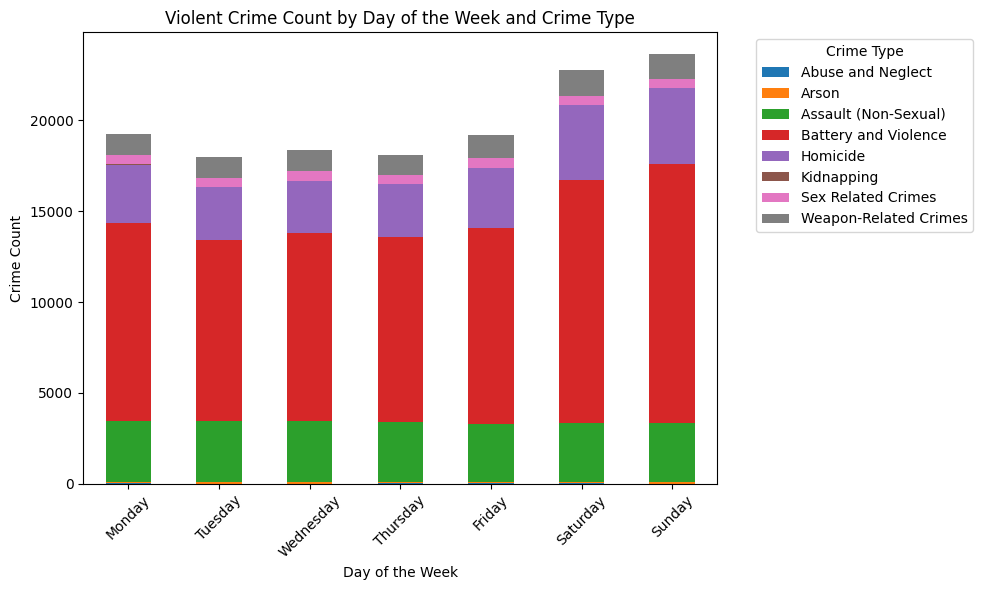

In [ ]:
import matplotlib.pyplot as plt

#count crimes
crime_counts = cases_loc.groupby(['day_of_week', 'general_crime_description']).size().reset_index(name='crime_count')

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#filter for violent crimes
mask = crime_counts['general_crime_description'].isin(violent_crimes)

violent_crimes_data = crime_counts[mask]

#pivot for violent crimes
violent_crimes_pivot_day = violent_crimes_data.pivot(index='day_of_week', columns='general_crime_description', values='crime_count').fillna(0)

violent_crimes_pivot_day = violent_crimes_pivot_day.reindex(weekday_order)

#plot
plt.figure(figsize=(10, 6))
violent_crimes_pivot_day.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel("Day of the Week")
plt.ylabel("Crime Count")
plt.title("Violent Crime Count by Day of the Week and Crime Type")
plt.xticks(rotation=45)
plt.legend(title="Crime Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



<Figure size 1000x600 with 0 Axes>

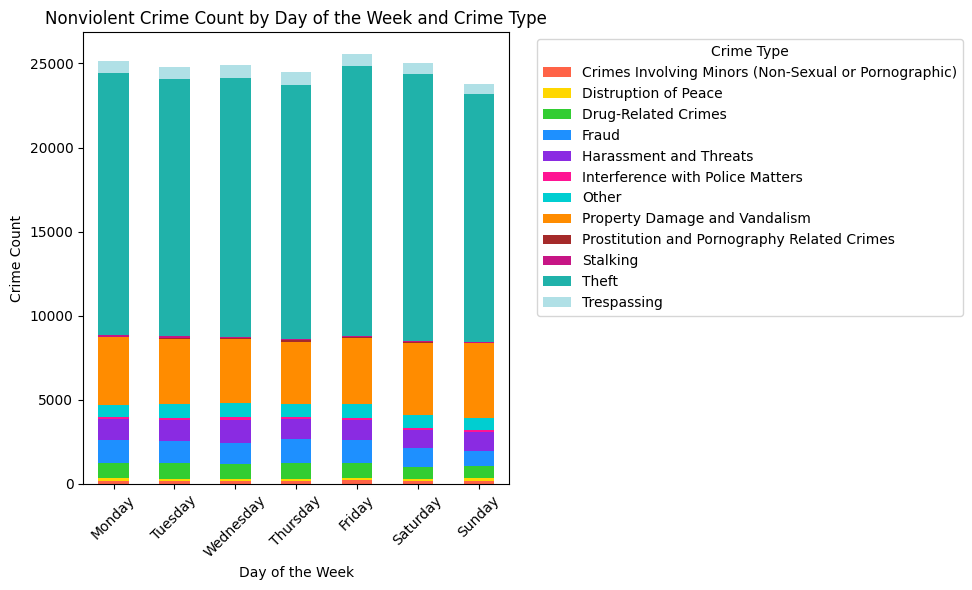

In [ ]:
#filter for nonviolent crimes
nonviolent_crimes_data = crime_counts[crime_counts['general_crime_description'].isin(nonviolent_crimes)]

#pivot for nonviolent crimes
nonviolent_crimes_pivot_day = nonviolent_crimes_data.pivot(index='day_of_week', columns='general_crime_description', values='crime_count').fillna(0)

nonviolent_crimes_pivot_day = nonviolent_crimes_pivot_day.reindex(weekday_order)

# Define a new list of 12 distinct colors
nonviolent_colors = ['#FF6347', '#FFD700', '#32CD32', '#1E90FF', '#8A2BE2', '#FF1493', '#00CED1',
                     '#FF8C00', '#A52A2A', '#C71585', '#20B2AA', '#B0E0E6']

#plot
plt.figure(figsize=(10, 6))
nonviolent_crimes_pivot_day.plot(kind='bar', stacked=True, figsize=(10, 6), color=nonviolent_colors)
plt.xlabel("Day of the Week")
plt.ylabel("Crime Count")
plt.title("Nonviolent Crime Count by Day of the Week and Crime Type")
plt.xticks(rotation=45)
plt.legend(title="Crime Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



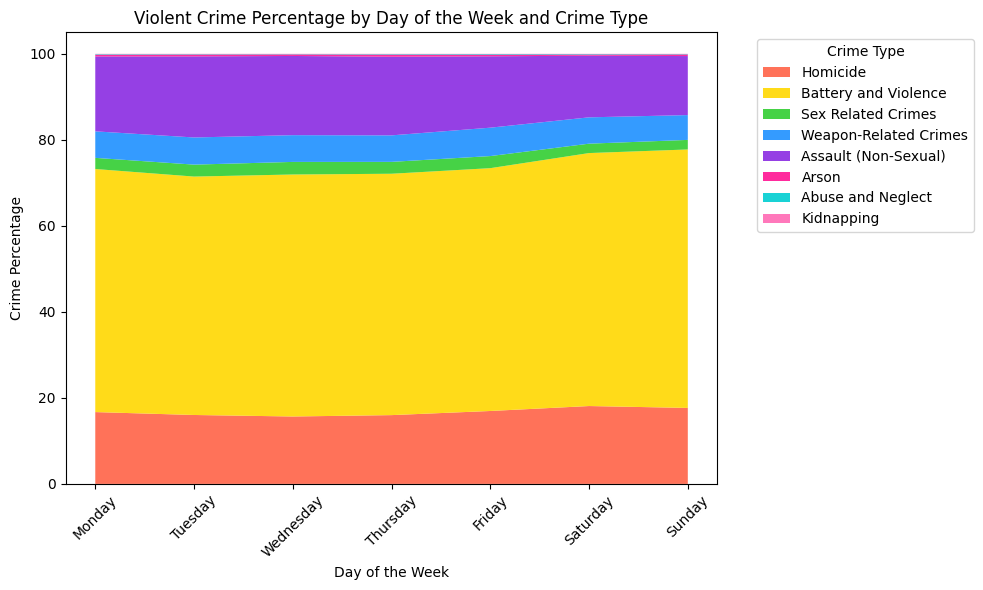

In [ ]:

# Convert counts to percentages
violent_crime_percentage = (violent_crimes_pivot_day.div(violent_crimes_pivot_day.sum(axis=1), axis=0)) * 100

violent_crime_percentage = violent_crime_percentage.reindex(weekday_order)

#colors for each crime type
colors = ['#FF6347', '#FFD700', '#32CD32', '#1E90FF', '#8A2BE2', '#FF1493', '#00CED1', '#FF69B4']

#plotting violent crimes and filling the area below the line with solid colors

plt.figure(figsize=(10, 6))


plt.stackplot(
    violent_crime_percentage.index,
    *[violent_crime_percentage[crime] for crime in violent_crimes],
    colors=colors,
    labels=violent_crimes,
    alpha=0.9
)

#legends and labels
plt.xlabel("Day of the Week")
plt.ylabel("Crime Percentage")
plt.title("Violent Crime Percentage by Day of the Week and Crime Type")
plt.xticks(rotation=45)
plt.legend(title="Crime Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



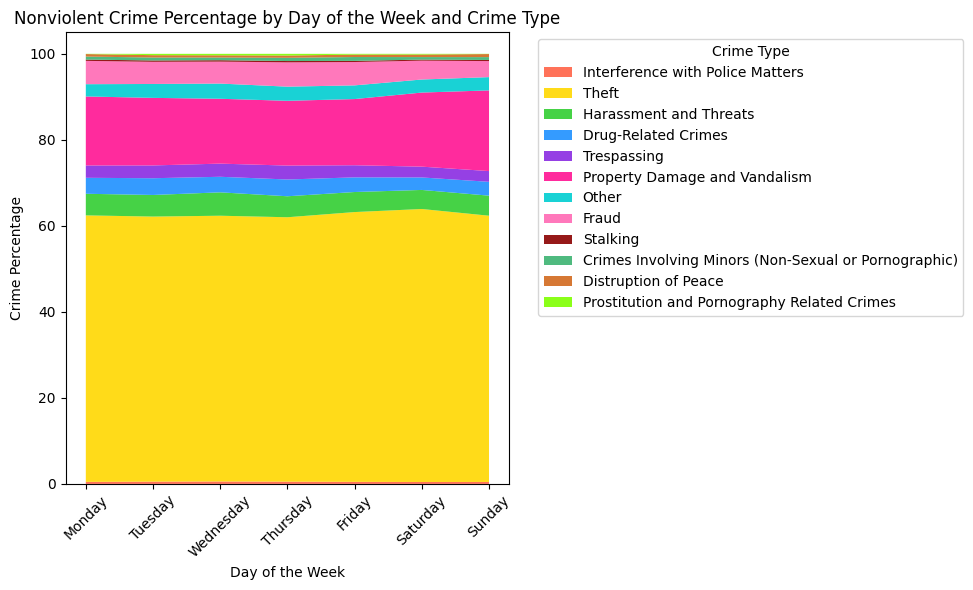

In [ ]:
#convert counts to percentages for nonviolent crimes
nonviolent_crime_percentage = (nonviolent_crimes_pivot_day.div(nonviolent_crimes_pivot_day.sum(axis=1), axis=0)) * 100

nonviolent_crime_percentage = nonviolent_crime_percentage.reindex(weekday_order)
#12 distinct solid colors for each crime type (nonviolnt)
nonviolent_colors = ['#FF6347', '#FFD700', '#32CD32', '#1E90FF', '#8A2BE2', '#FF1493', '#00CED1',
                     '#FF69B4', '#8B0000', '#3CB371', '#D2691E', '#7FFF00']

#plotting nonviolent crimes, and filling the area below with solid colors
plt.figure(figsize=(10, 6))

plt.stackplot(
    nonviolent_crime_percentage.index,
    *[nonviolent_crime_percentage[crime] for crime in nonviolent_crimes],  #loop for crimes
    colors=nonviolent_colors,
    labels=nonviolent_crimes,  #label each crime
    alpha=0.9  # Solid color fill
)

#labels and title
plt.xlabel("Day of the Week")
plt.ylabel("Crime Percentage")
plt.title("Nonviolent Crime Percentage by Day of the Week and Crime Type")
plt.xticks(rotation=45)

#legend
plt.legend(title="Crime Type", bbox_to_anchor=(1.05, 1), loc='upper left')

#adjust layout
plt.tight_layout()

plt.show()


<Figure size 1000x600 with 0 Axes>

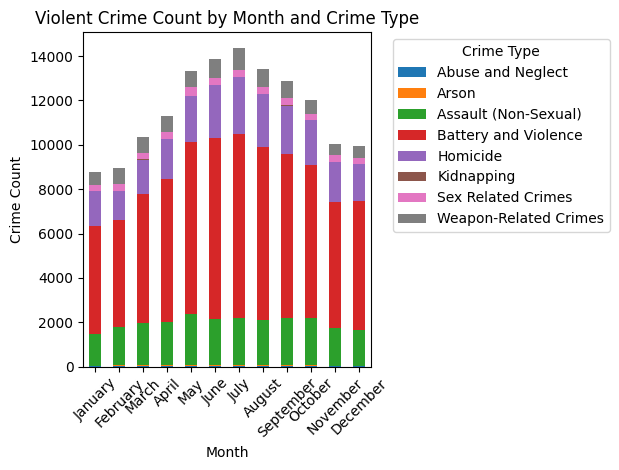

In [ ]:

#count all crimes
crime_counts = cases_loc.groupby(['month', 'general_crime_description']).size().reset_index(name='crime_count')

#violent crimes
violent_crimes_data = crime_counts[crime_counts['general_crime_description'].isin(violent_crimes)]

#get violent crime counts
violent_crime_counts = violent_crimes_data.groupby(['month', 'general_crime_description']).sum().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
violent_crime_counts['month'] = pd.Categorical(violent_crime_counts['month'], categories=month_order, ordered=True)

#pivot
violent_crime_pivot_month = violent_crime_counts.pivot(index='month', columns='general_crime_description', values='crime_count').fillna(0)

#plot the stacked bar chart
plt.figure(figsize=(10, 6))
violent_crime_pivot_month.plot(kind='bar', stacked=True)


plt.xlabel("Month")
plt.ylabel("Crime Count")
plt.title("Violent Crime Count by Month and Crime Type")
plt.xticks(rotation=45)
plt.legend(title="Crime Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




<ipython-input-498-448a652aadac>:23: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



<Figure size 1600x800 with 0 Axes>

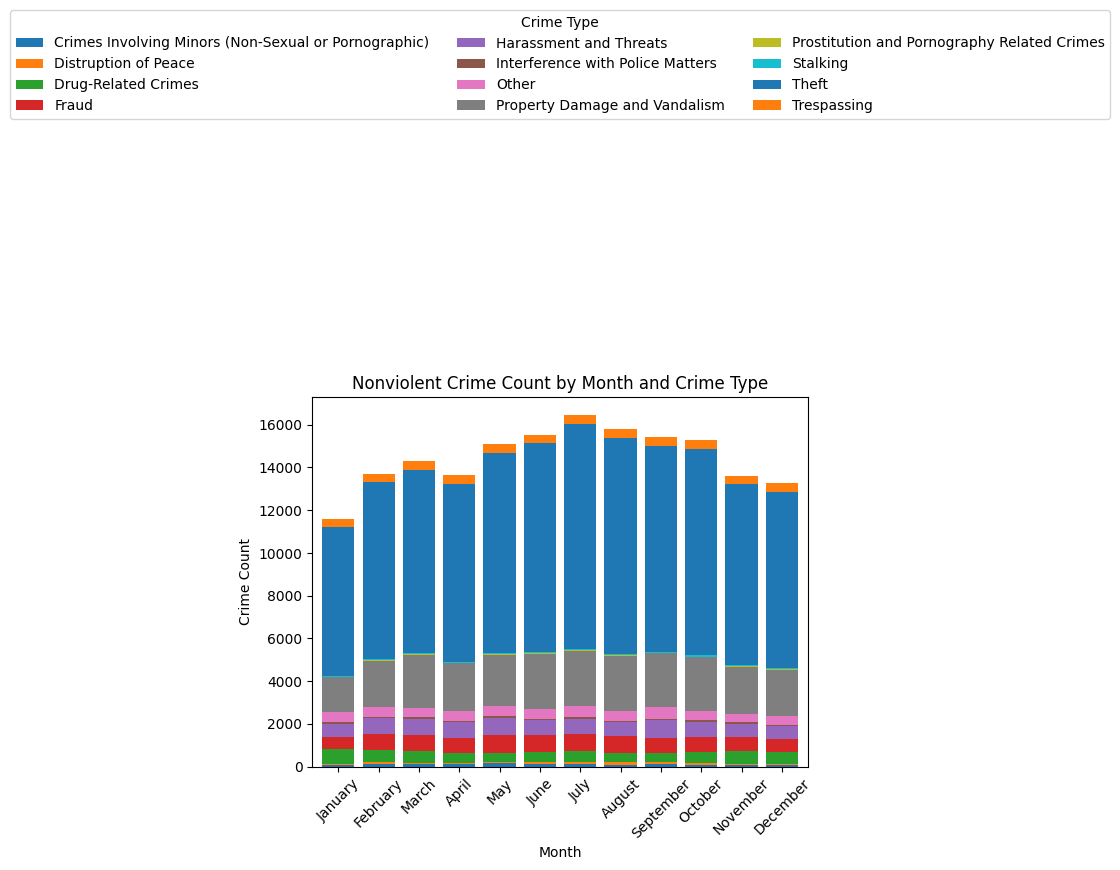

In [ ]:

#nonviolent crimes
nonviolent_crimes_data = crime_counts[crime_counts['general_crime_description'].isin(nonviolent_crimes)]

#get nonviolent crime counts
nonviolent_crime_counts = nonviolent_crimes_data.groupby(['month', 'general_crime_description']).sum().reset_index()

nonviolent_crime_counts['month'] = pd.Categorical(nonviolent_crime_counts['month'], categories=month_order, ordered=True)

#pivot
nonviolent_crime_pivot_month = nonviolent_crime_counts.pivot(index='month', columns='general_crime_description', values='crime_count').fillna(0)

#plot
plt.figure(figsize=(16, 8))

nonviolent_crime_pivot_month.plot(kind='bar', stacked=True, width=0.8)

plt.xlabel("Month")
plt.ylabel("Crime Count")
plt.title("Nonviolent Crime Count by Month and Crime Type")
plt.xticks(rotation=45)
plt.legend(title="Crime Type", bbox_to_anchor=(0.5, 1.9), loc='center', ncol=3)

plt.tight_layout()

plt.show()


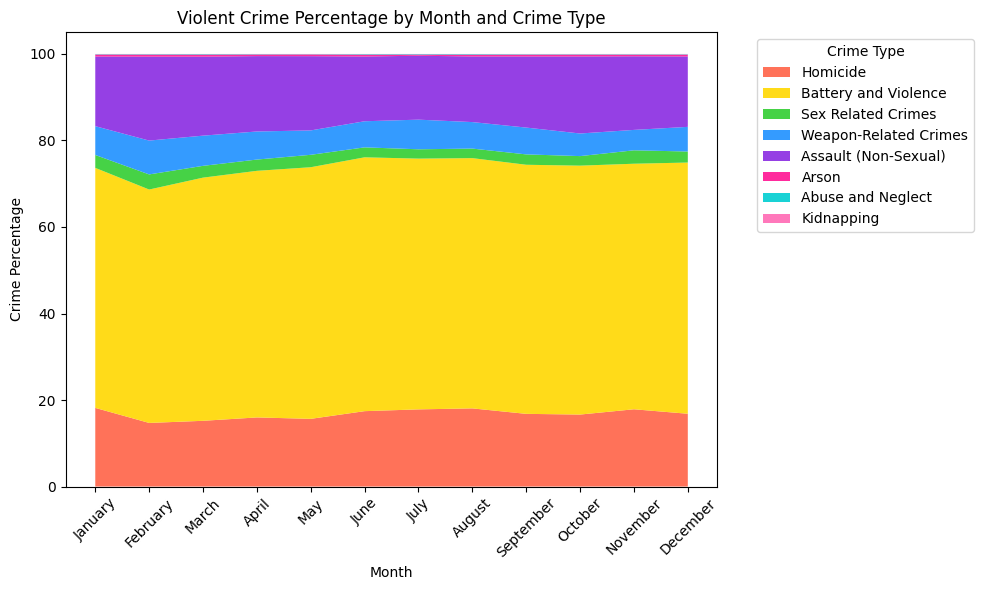

In [ ]:
#get percentages
violent_crime_percentage = (violent_crime_pivot_month.div(violent_crime_pivot_month.sum(axis=1), axis=0)) * 100


colors = ['#FF6347', '#FFD700', '#32CD32', '#1E90FF', '#8A2BE2', '#FF1493', '#00CED1',
                  '#FF69B4', '#8B0000', '#3CB371', '#D2691E', '#7FFF00']

#plot
plt.figure(figsize=(10, 6))

plt.stackplot(
    violent_crime_percentage.index,
    *[violent_crime_percentage[crime] for crime in violent_crimes],  #loop for crimes
    colors=colors,
    labels=violent_crimes,  #label each crime type
    alpha=0.9  #solid color
)

#labels and title
plt.xlabel("Month")
plt.ylabel("Crime Percentage")
plt.title("Violent Crime Percentage by Month and Crime Type")
plt.xticks(rotation=45)

#legend
plt.legend(title="Crime Type", bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()


plt.show()


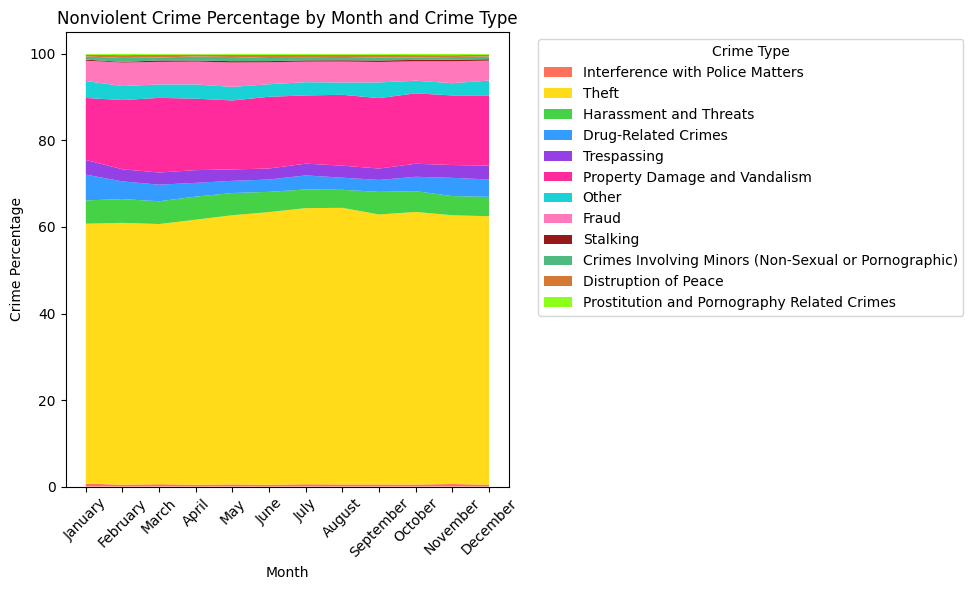

In [ ]:
#get percentages
nonviolent_crime_percentage = (nonviolent_crime_pivot_month.div(nonviolent_crime_pivot_month.sum(axis=1), axis=0)) * 100

#plot
plt.figure(figsize=(10, 6))

plt.stackplot(
    nonviolent_crime_percentage.index,
    *[nonviolent_crime_percentage[crime] for crime in nonviolent_crimes],  # Use a loop for crimes
    colors=colors,
    labels=nonviolent_crimes,
    alpha=0.9 #solid color
)

#labels and legends
plt.xlabel("Month")
plt.ylabel("Crime Percentage")
plt.title("Nonviolent Crime Percentage by Month and Crime Type")
plt.xticks(rotation=45)

plt.legend(title="Crime Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()


<Figure size 1600x1000 with 0 Axes>

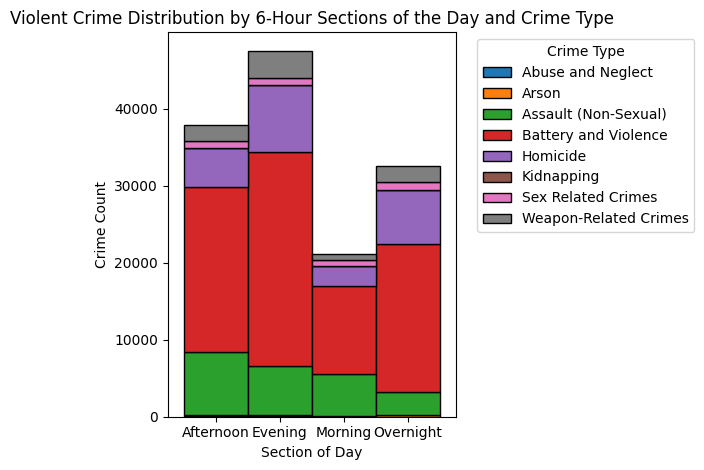

In [ ]:
#for different parts of the day (6-hour intervals)
def get_section_of_day(hour):
    if 0 <= hour < 6:
        return 'Overnight'  #midnight to 5:59
    elif 6 <= hour < 12:
        return 'Morning'  #6:00 to 11:59
    elif 12 <= hour < 18:
        return 'Afternoon'  #12:00 to 17:59
    else:
        return 'Evening'  #18:00 to 23:59

#extract hour
cases_loc['hour'] = pd.to_datetime(cases_loc['time_of_crime'], format='%H:%M:%S').dt.hour

#use the function to categorize crimes based on the hour
cases_loc['section_of_day'] = cases_loc['hour'].apply(get_section_of_day)

crime_counts = cases_loc.groupby(['section_of_day', 'general_crime_description']).size().reset_index(name='crime_count')

#violent crime counst
violent_crimes_counts = crime_counts[crime_counts['general_crime_description'].isin(violent_crimes)]

#pivot
violent_crime_pivot_time = violent_crime_counts.pivot(index='section_of_day', columns='general_crime_description', values='crime_count').fillna(0)

plt.figure(figsize=(16, 10))
violent_crime_pivot_time.plot(kind='bar', stacked=True, width=1.0, edgecolor='black')

#labels and legends
plt.xlabel("Section of Day")
plt.ylabel("Crime Count")
plt.title("Violent Crime Distribution by 6-Hour Sections of the Day and Crime Type")
plt.xticks(rotation=0)
plt.legend(title="Crime Type", bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()



<ipython-input-512-400a6c8297ea>:18: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



<Figure size 4000x1200 with 0 Axes>

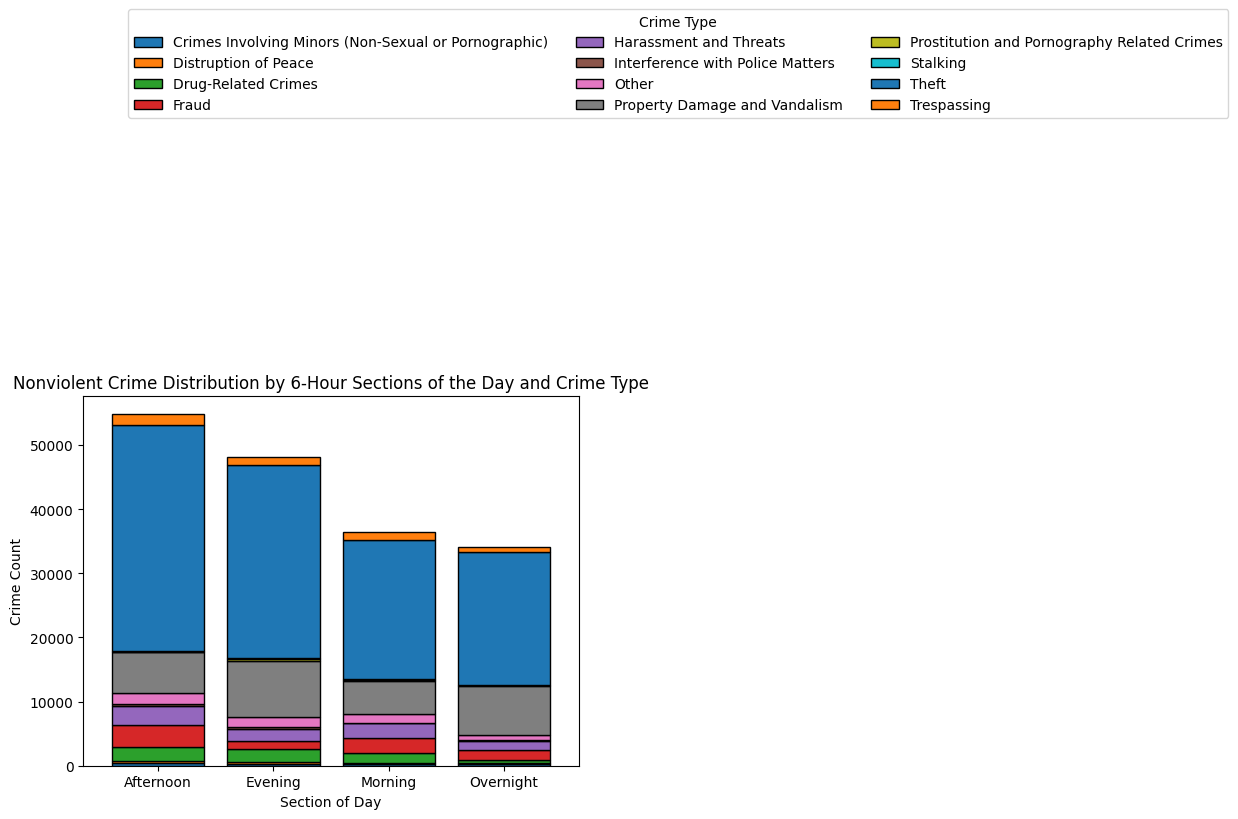

In [ ]:

#nonviolent crimes
nonviolent_crime_counts = crime_counts[crime_counts['general_crime_description'].isin(nonviolent_crimes)]

#pivot
nonviolent_crime_pivot_time = nonviolent_crime_counts.pivot(index='section_of_day', columns='general_crime_description', values='crime_count').fillna(0)

plt.figure(figsize=(40, 12))
nonviolent_crime_pivot_time.plot(kind='bar', stacked=True, width=0.8, edgecolor='black')

plt.xlabel("Section of Day")
plt.ylabel("Crime Count")
plt.title("Nonviolent Crime Distribution by 6-Hour Sections of the Day and Crime Type")
plt.xticks(rotation=0)
plt.legend(title="Crime Type", bbox_to_anchor=(1.2, 1.9), loc='center', ncol=3)

plt.tight_layout()
plt.show()


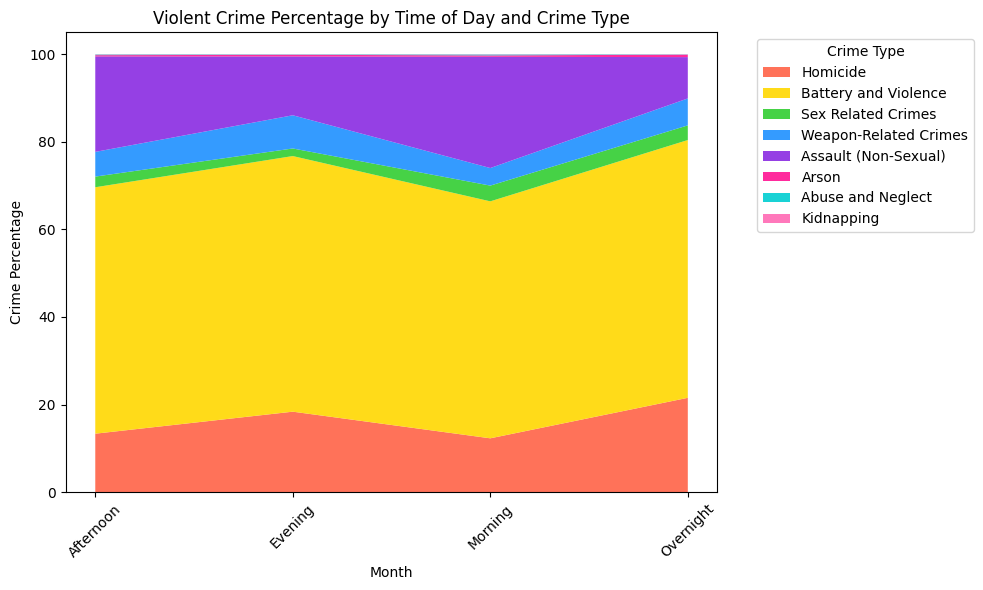

In [ ]:
violent_crime_percentage = (violent_crime_pivot_time.div(violent_crime_pivot_time.sum(axis=1), axis=0)) * 100


plt.figure(figsize=(10, 6))

plt.stackplot(
    violent_crime_percentage.index,
    *[violent_crime_percentage[crime] for crime in violent_crimes],
    colors=colors,
    labels=violent_crimes,
    alpha=0.9
)

plt.xlabel("Month")
plt.ylabel("Crime Percentage")
plt.title("Violent Crime Percentage by Time of Day and Crime Type")
plt.xticks(rotation=45)

plt.legend(title="Crime Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()


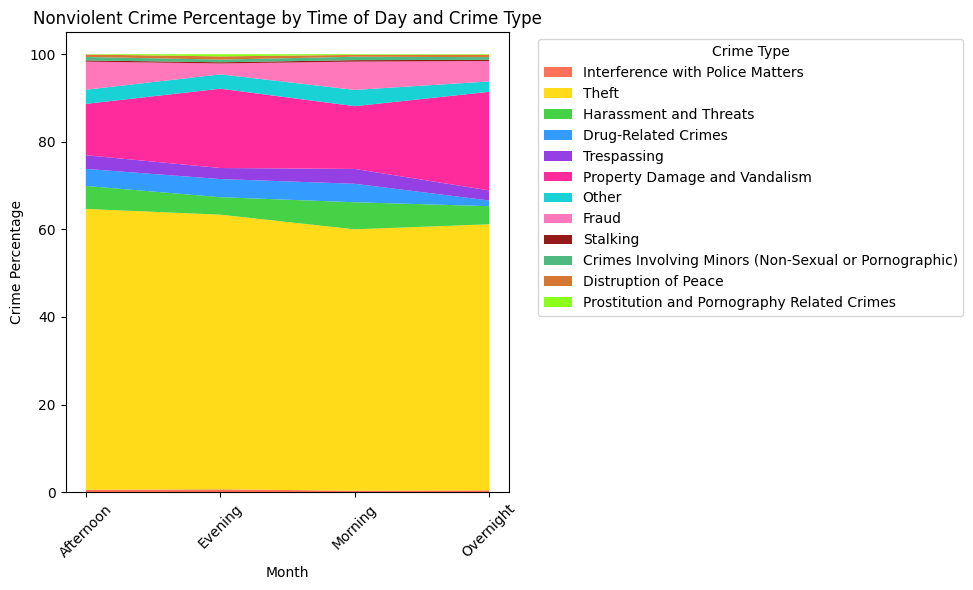

In [ ]:
nonviolent_crime_percentage = (nonviolent_crime_pivot_time.div(nonviolent_crime_pivot_time.sum(axis=1), axis=0)) * 100

plt.figure(figsize=(10, 6))

plt.stackplot(
    nonviolent_crime_percentage.index,
    *[nonviolent_crime_percentage[crime] for crime in nonviolent_crimes],
    colors=colors,
    labels=nonviolent_crimes,
    alpha=0.9
)

#labels and title
plt.xlabel("Month")
plt.ylabel("Crime Percentage")
plt.title("Nonviolent Crime Percentage by Time of Day and Crime Type")
plt.xticks(rotation=45)


plt.legend(title="Crime Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()


In [ ]:
#for this analysis, we will go back to the original merged df and drop rows where we do not have location descriptions
#count rows before and after dropping missing description values
original_count = len(matching_cases)
cases_loc = matching_cases.dropna(subset=['location_description'])
removed_count = original_count - len(cases_loc)
print(f"Removed {removed_count} rows with missing location descriptions, or {(removed_count/original_count)*100} percent of rows")

Removed 900 rows with missing location descriptions, or 0.2876327505041563 percent of rows


In [ ]:


category_mapping = {
    r'CTA|BUS|TRAIN|TRANSPORTATION|RAIL': 'Public Transport',
    r'PARKING\s*LOT|GARAGE': 'Parking Lots and Garages',
    r'AUTO|CAR|VEHICLE|TAXI|CAB|TRUCK': 'Vehicle & Auto related',
    r'STORE|SHOP': 'Stores',
    r'STAIRWELL|HALLWAY|ELEVATOR|VESTIBULE': 'Building Passageways',
    r'BARBER|SALON': 'Barbershop or Salon',
    r'SCHOOL|COLLEGE|UNIVERSITY|YMCA|DAY\s*CARE|LIBRARY': 'Education Centers',
    r'RESTAURANT': 'Restaurants',
    r'BAR|TAVERN|CLUB': 'Bars',
    r'GAME|BETTING|CASINO|GAMBL': 'Casinos',
    r'CHURCH|TEMPLE|MOSQUE|CATHEDRAL|SYNAGOGUE | PRAYER': 'Religious Settings',
    r'HOME|HOUSE|APARTMENT|RESIDENT|RESIDENCE|CHA|PORCH|SHELTER|BASEMENT|DRIVEWAY|FIRE ESCAPE': 'Residential Spaces',
    r'GAS\s*STATION': 'Gas Stations',
    r'FACTORY': 'Factories',
    r'PUBLIC|ALLEY|GANGWAY|SIDEWALK|HIGHWAY|STREET|BRIDGE': 'Public Spaces',
    r'HOTEL|MOTEL': 'Hotel | Motel',
    r'PARK|BEACH|FOREST|LAGOON|RIVER|POOL|BOAT|WOOD|LAKE|PRAIRIE|FARM|LAND': 'Natural Environment (Nature)',
    r'VACANT\s*LOT|LAND|CONSTRUCTION|ABANDONED|YARD|LOT|GROUND|DUMP': 'Construction sites and Abandoned Spaces',
    r'HOSPITAL': 'Hospitals',
    r'CEMETARY|FUNERAL': 'Cemetaries and Funeral Homes',
    r'JAIL|PRISON|POLICE|FIRE STATION': 'Correctional and Emergency Response Facilities',
    r'AIRPORT|AIRCRAFT|TARMAC|RUNWAY': 'Airports',
    r'SPORTS|STADIUM|ARENA':'Sports and Entertainment Venues',
    r'SEWER': 'Sewers',
    r'BUSINESS|OFFICE|HALL|BANK|BUILDING|ROOF|CREDIT|COIN|LOAN': 'Business and Offices',
    r'LAUNDRY|LAUNDROMAT|CLEAN': 'Laundromat and Cleaners'
}

#assign general descriptions
def category_description(desc):
    for pattern, category in category_mapping.items():
        if re.search(pattern, desc):
            return category
    return 'Other'  #if no match

cases_loc['location_category'] = cases_loc['location_description'].apply(category_description)


cases_loc['location_category'].unique()

<ipython-input-537-06c735004a6d>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(['Vehicle & Auto related', 'Public Spaces', 'Residential Spaces',
       'Stores', 'Parking Lots and Garages', 'Bars', 'Public Transport',
       'Building Passageways', 'Construction sites and Abandoned Spaces',
       'Restaurants', 'Hotel | Motel', 'Natural Environment (Nature)',
       'Correctional and Emergency Response Facilities', 'Gas Stations',
       'Business and Offices', 'Religious Settings',
       'Laundromat and Cleaners', 'Education Centers', 'Sewers',
       'Hospitals', 'Other', 'Cemetaries and Funeral Homes', 'Factories',
       'Sports and Entertainment Venues', 'Airports', 'Casinos'],
      dtype=object)

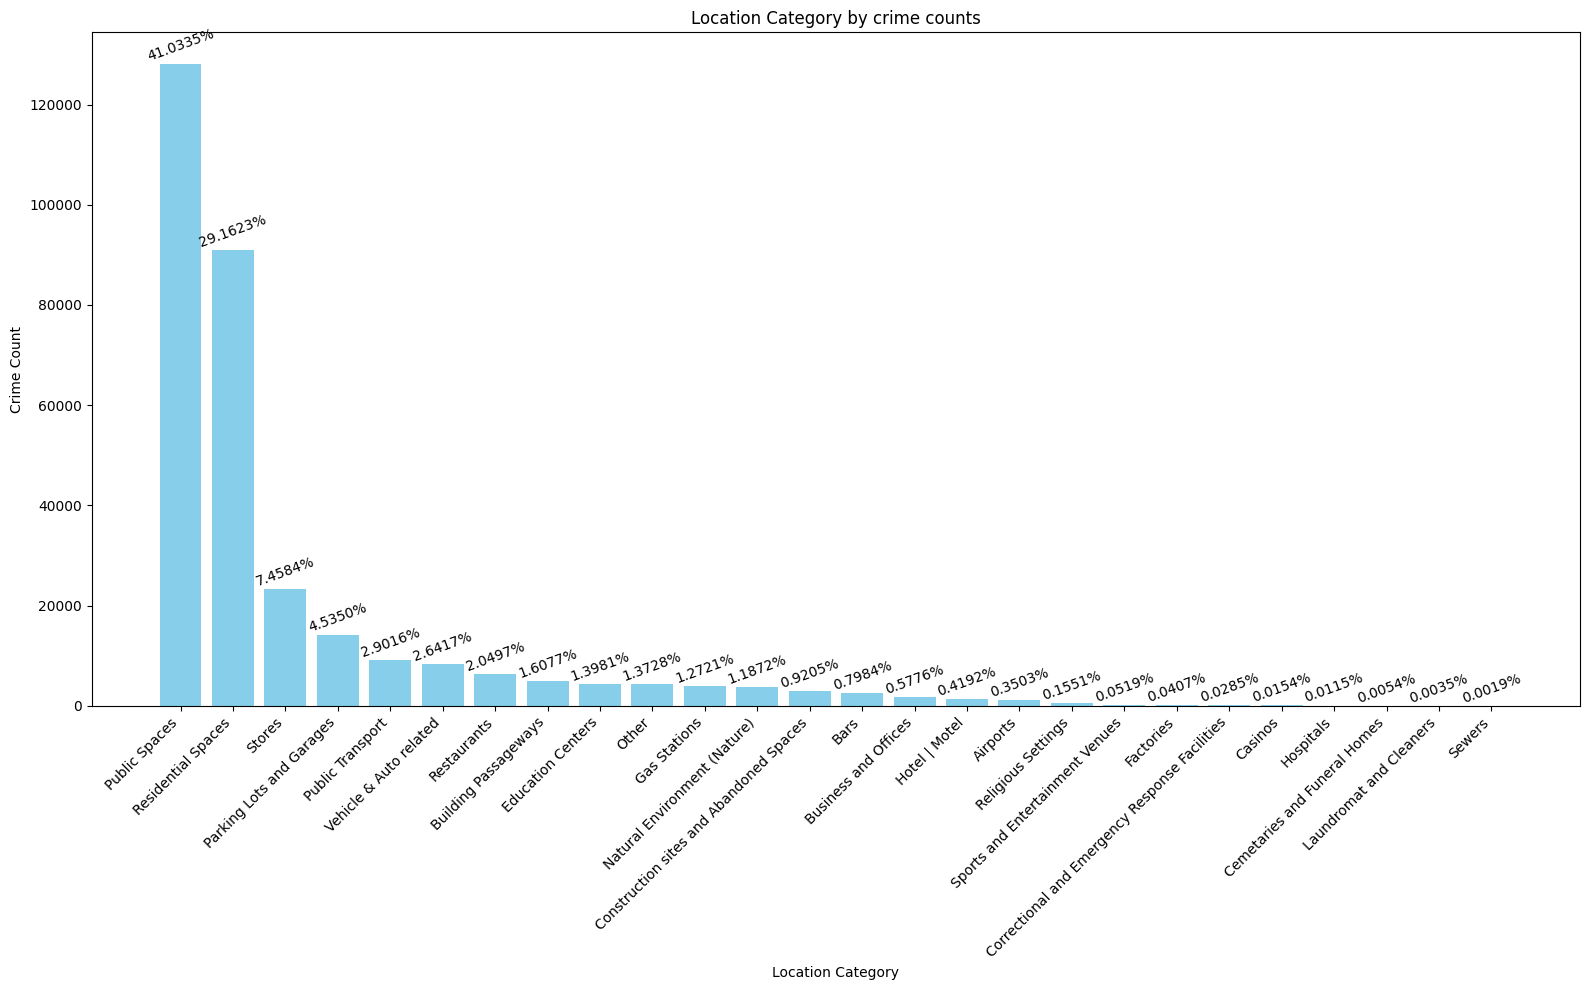

In [ ]:
#count crimes
location_crime_counts = cases_loc.groupby('location_category').size().reset_index(name='crime_count')

location_crime_counts = location_crime_counts.sort_values('crime_count', ascending=False)

#compute percentages
total_crime_count = location_crime_counts['crime_count'].sum()

plt.figure(figsize=(16, 10))
bars = plt.bar(location_crime_counts['location_category'], location_crime_counts['crime_count'], color='skyblue')


plt.xlabel('Location Category')
plt.ylabel('Crime Count')
plt.title('Location Category by crime counts')

plt.xticks(rotation=45, ha='right', fontsize=10)

for bar in bars:
    y = bar.get_height()
    percentage = (y / total_crime_count) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, y + 50, f'{percentage:.4f}%', ha='center', va='bottom',
             fontsize=10, rotation=20)

plt.tight_layout()

plt.show()



In [ ]:
#load data for nieghbrohoods in chicago
neighborhoods= pd.read_csv("neighborhoods.csv")

In [ ]:
#rename columns
neighborhoods=neighborhoods.rename(columns={'the_geom':'coordinates','PRI_NEIGH':'primary_name','SEC_NEIGH':'secondary_name','SHAPE_AREA':'shape_area','SHAPE_LEN':'shape_length'})

In [ ]:
#drop undeeded data
neighborhoods = neighborhoods.drop(columns=['shape_area', 'shape_length','secondary_name'],axis=1)
neighborhoods.columns

Index(['coordinates', 'primary_name'], dtype='object')

In [ ]:
from shapely import wkt, centroid

#convert wkt strings to multipolygons
neighborhoods['coordinates'] = neighborhoods['coordinates'].apply(wkt.loads)

In [ ]:
#compute the centroid for each multipolygon
neighborhoods['centroid'] = neighborhoods['coordinates'].apply(lambda geom: geom.centroid)

#x and y coordinates
neighborhoods['centroid_x'] = neighborhoods['centroid'].apply(lambda c: c.x)
neighborhoods['centroid_y'] = neighborhoods['centroid'].apply(lambda c: c.y)

In [ ]:
neighborhoods.columns

Index(['coordinates', 'primary_name', 'centroid', 'centroid_x', 'centroid_y'], dtype='object')

In [ ]:
#drop rows where latitude or longitude is NaN
#count rows before and after dropping missing description values
original_count = len(matching_cases)
cases_loc = cases_loc.dropna(subset=['longitude', 'latitude'])
removed_count = original_count - len(cases_loc)
print(f"Removed {removed_count} rows with missing location descriptions, or {(removed_count/original_count)*100} percent of rows")

Removed 983 rows with missing location descriptions, or 0.3141588819395396 percent of rows


In [ ]:
import numpy as np
from scipy.spatial.distance import cdist

#get and array of [centroid_x, centroid_y] for each neighborhood
centroids = np.array(list(zip(neighborhoods['centroid_x'], neighborhoods['centroid_y'])))

#define the function to find the closest neighborhood using distance formula
def find_closest_neighborhood(coordinate):
    #calculate the distances between the crime and each centroid
    distances = cdist([coordinate], centroids, metric='euclidean')

    #find the index of the closest centroid for the crime
    closest_centroid_idx = np.argmin(distances)

    #return the closest neighborhood (primary_name) based on the closest centroid
    closest_neighborhood = neighborhoods.iloc[closest_centroid_idx]['primary_name']
    return closest_neighborhood


In [ ]:
!pip install plotly #install plotly

In [ ]:
#plot with original data, regardless of NAN descriptions
cases_loc=matching_cases
#get list of coordinates
cases_loc['coordinate'] = cases_loc[['longitude','latitude']].values.tolist()

cases_loc['nearest_neighborhood'] = cases_loc['coordinate'].apply(
    lambda coord: find_closest_neighborhood(coord))

#get crime counts per neighborhood
crime_counts_by_neighborhood = cases_loc.groupby('nearest_neighborhood').size().reset_index(name='crime_count')

#map the crime counts to the neighborhoods df
#make dictionary to easily get crime counts by neighborhood
crime_count_dict = dict(zip(crime_counts_by_neighborhood['nearest_neighborhood'], crime_counts_by_neighborhood['crime_count']))

#map the crime counts to the neighborhoods df based on primary_name
neighborhoods['crime_count'] = neighborhoods['primary_name'].map(crime_count_dict)

In [ ]:
#create hover text that includes both the neighborhood name and the crime count
neighborhoods['hover_text'] = neighborhoods['primary_name'] + '<br>Crime Count: ' + neighborhoods['crime_count'].astype(str)

#calculate the center of all centroids (average lat and lon) to focus the map
avg_lat = centroids[:, 1].mean()  #average latitude
avg_lon = centroids[:, 0].mean()  #average longitude

#plotting the centroids with crime counts and neighborhood names as hover text
fig = go.Figure()

#plot the centroids with the crime counts and neighborhood names as hover text
fig.add_trace(go.Scattermapbox(
    lon=neighborhoods['centroid_x'],
    lat=neighborhoods['centroid_y'],
    text=neighborhoods['primary_name'],  #show neighborhood names
    hovertext=neighborhoods['hover_text'],  #show both neighborhood name and crime count on hover
    mode='markers+text',
    textposition="top center",
    textfont=dict(size=10),
    marker=dict(
        size=8,  #marker size for centroids
        color=neighborhoods['crime_count'],  #color based on crime count
        colorscale='YlOrRd',  #yellow, orange, red color scale
        showscale=True,  #display the color scale
        colorbar=dict(title="Crime Count")  #colorbar with the title 'Crime Count'
    ),
    name="Neighborhood Centroids"
))

#mapbox style; zoom based on centroid distribution
fig.update_layout(
    title_text='Neighborhood Centroids in Chicago (Crime Count)<br>(Hover for details)',
    mapbox=dict(
        style="carto-positron",  #set the mapbox style
        center=dict(lat=avg_lat, lon=avg_lon),  #center the map around the average of all centroids
        zoom=9,  #adjust zoom to fit all points (less zoom shows more area)
    ),
    showlegend=False  #hide the legend
)

fig.show()


In [ ]:
import plotly.graph_objects as go

#create hover text that includes both the neighborhood name and the crime count
neighborhoods['hover_text'] = neighborhoods['primary_name'] + '<br>Crime Count: ' + neighborhoods['crime_count'].astype(str)

#calculate the center of all centroids (average lat and lon) to focus the map
avg_lat = centroids[:, 1].mean()  # Average latitude
avg_lon = centroids[:, 0].mean()  # Average longitude

#plotting the centroids with crime counts and neighborhood names as hover text
fig = go.Figure()

#size scale for the markers
min_size = 5  #minimum size for the markers
max_size = 30  #maximum size for the markers

#scale the size of the markers according to the crime counts
scaled_sizes = min_size + (neighborhoods['crime_count'] - neighborhoods['crime_count'].min()) / \
              (neighborhoods['crime_count'].max() - neighborhoods['crime_count'].min()) * (max_size - min_size)

#plot the centroids with the crime counts and neighborhood names as hover text
fig.add_trace(go.Scattermapbox(
    lon=neighborhoods['centroid_x'],
    lat=neighborhoods['centroid_y'],
    text=neighborhoods['primary_name'],
    hovertext=neighborhoods['hover_text'],  #show both neighborhood name and crime count on hover
    mode='markers+text',
    textposition="top center",
    textfont=dict(size=10),
    marker=dict(
        size=scaled_sizes,  #marker size based on crime count
        color=neighborhoods['crime_count'],  #color based on crime count
        colorscale='YlOrRd',  #color scale
        showscale=True,  #display the color scale
        colorbar=dict(title="Crime Count")
    ),
    name="Neighborhood Centroids"
))


fig.update_layout(
    title_text='Neighborhood Centroids in Chicago (Crime Count)<br>(Hover for details)',
    mapbox=dict(
        style="carto-positron",
        center=dict(lat=avg_lat, lon=avg_lon),  #center the map around the average of all centroids
        zoom=8.9,  #lower zoom shows more area
    ),
    showlegend=False)  #hide legend

fig.show()


In [ ]:
neighborhoods = neighborhoods.sort_values(by='crime_count', ascending=False)
neighborhoods[['primary_name', 'crime_count']].head(10)



,primary_name,crime_count
94,Austin,15677
19,Englewood,12070
5,Garfield Park,10441
6,North Lawndale,10071
70,Auburn Gresham,9722
4,Humboldt Park,8746
59,South Shore,8265
20,Grand Crossing,7798
69,Chicago Lawn,6696
60,Chatham,6339
